<a href="https://colab.research.google.com/github/rimalsaksham07/Genetic-Algorithm/blob/main/genetic_agorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Approximate solution: -2.484375
F(-2.484375) = -0.3115234375


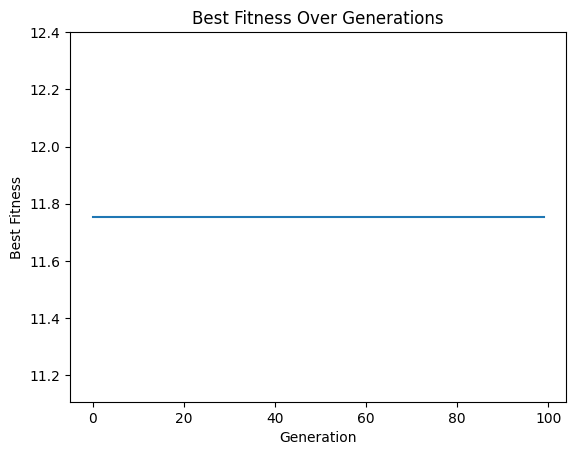

In [3]:
import random

def encode(x):
    sign = '1' if x >= 0 else '0'
    integer = format(abs(int(x)), '05b')
    fractional = format(int(abs(x) % 1 * 64), '06b')
    return sign + integer + fractional

def decode(binary):
    sign = 1 if binary[0] == '1' else -1
    integer = int(binary[1:6], 2)
    fractional = int(binary[6:], 2) / 64
    return sign * (integer + fractional)

def crossover(parent1, parent2):
    point1, point2 = sorted(random.sample(range(1, len(parent1)), 2))
    child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
    child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
    return child1, child2

def genetic_algorithm(population_size=50, generations=100):
    population = [''.join(random.choice('01') for _ in range(12)) for _ in range(population_size)]
    best_fitness_over_time = []

    for _ in range(generations):
        fitness = [abs(4 * decode(ind)**2 - 25) for ind in population]
        best_fitness = min(fitness)
        best_fitness_over_time.append(best_fitness)

        # Add a small value (epsilon) to the fitness values to avoid division by zero.
        epsilon = 1e-6
        parents = random.choices(population, weights=[1/(f + epsilon) for f in fitness], k=population_size)

        new_population = []
        for i in range(0, population_size, 2):
            child1, child2 = crossover(parents[i], parents[i+1])
            new_population.extend([child1, child2])

        population = new_population

    best_individual = min(population, key=lambda ind: abs(4 * decode(ind)**2 - 25))
    return decode(best_individual), best_fitness_over_time

if __name__ == "__main__":
    result, best_fitness = genetic_algorithm()
    print(f"Approximate solution: {result}")
    print(f"F({result}) = {4 * result**2 - 25}")


import matplotlib.pyplot as plt

result, best_fitness = genetic_algorithm()

plt.plot(best_fitness)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness Over Generations')
plt.show()